# Task 1 - Prediction using Supervised ML 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data.head(20)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [20]:
data.shape

(25, 2)

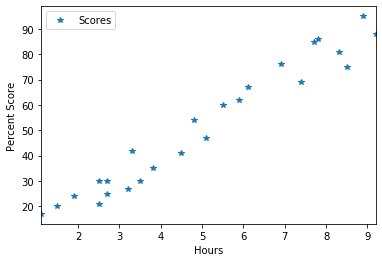

In [21]:
data.plot(x="Hours", y = "Scores", style='*')
plt.xlabel('Hours')  
plt.ylabel('Percent Score')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split  
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=0) 

In [24]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

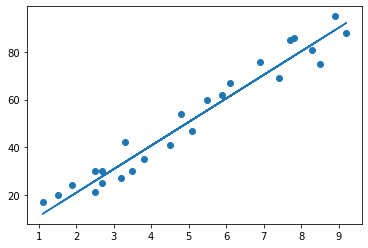

In [25]:
line = regressor.coef_*X+regressor.intercept_

plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [26]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]]


In [27]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,15.947762
1,27,32.773947
2,69,74.344523
3,30,25.845518
4,62,59.497889
5,35,38.712601
6,24,19.906864
7,86,78.303625
8,76,69.395645
9,17,11.988659


In [28]:
Hours = 7.8
own_pred = regressor.predict([[Hours]])
print("No of Hours = {}".format(Hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 7.8
Predicted Score = 78.30362545095691


In [29]:
print(regressor.score(X_train,y_train))
print(regressor.score(X_test,y_test))

0.9440108159733135
0.956640847232559


In [30]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.8945108634106065
